In [56]:
import requests
import json
import csv
from bs4 import BeautifulSoup
import traceback
import cloudscraper

In [81]:
make="HYUNDAI"
model="IONIQ"
postcode="SW1A 0AA"
radius=1500
min_year=2020
max_year=2020
include_writeoff="exclude"
max_attempts_per_page=5
verbose=False

# To bypass Cloudflare protection
scraper = cloudscraper.create_scraper()

# Basic variables
results = []
n_this_year_results = 0

url = "https://www.autotrader.co.uk/results-car-search"

keywords = {}
keywords["mileage"] = ["miles"]
keywords["BHP"] = ["BHP"]
keywords["transmission"] = ["Automatic", "Manual"]
keywords["fuel"] = [
  "Petrol", 
  "Diesel", 
  "Electric", 
  "Hybrid – Diesel/Electric Plug-in", 
  "Hybrid – Petrol/Electric", 
  "Hybrid – Petrol/Electric Plug-in"
]
keywords["owners"] = ["owners"]
keywords["body"] = [
  "Coupe", 
  "Convertible", 
  "Estate", 
  "Hatchback", 
  "MPV", 
  "Pickup", 
  "SUV", 
  "Saloon"
]
keywords["ULEZ"] = ["ULEZ"]
keywords["year"] = [" reg)"]
keywords["engine"] = ["engine"]

# Set up parameters for query to autotrader.co.uk
params = {
    "sort": "relevance",
    "postcode": postcode,
    "radius": radius,
    "make": make,
    "model": model,
    "search-results-price-type": "total-price",
    "search-results-year": "select-year",
}

if (include_writeoff == "include"):
    params["writeoff-categories"] = "on"
elif (include_writeoff == "exclude"):
    params["exclude-writeoff-categories"] = "on"
elif (include_writeoff == "writeoff-only"):
    params["only-writeoff-categories"] = "on"

year = min_year
page = 1
attempt = 1

In [82]:
# try:
#     while year <= max_year:
params["year-from"] = year
params["year-to"] = year
params["page"] = page
r = scraper.get(url, params=params)


In [83]:
r.text

'{\n"url":"/car-search?sort=relevance&postcode=SW1A%200AA&radius=1500&make=HYUNDAI&model=IONIQ&exclude-writeoff-categories=on&year-from=2020&year-to=2020&page=1",\n"html":"<div class=\\"js-search-results\\">\\n    <div class=\\"js-banner-loader-turn-off\\" data-feature=\\"\\"><\\/div>\\n\\n\\n        <header class=\\"search-page__header\\">\\n            <nav class=\\"paginationMini\\">\\n                <ul class=\\"paginationMini--ul\\">\\n                    <li class=\\"paginationMini--li\\">\\n                            <span class=\\"paginationMini--left__inactive\\">\\n                                <i class=\\"icon\\">\\n                                    <svg><use xlink:href=\\"\\/templates\\/_generated\\/svg_icons\\/common.svg#icon-arrow-left\\"><\\/use><\\/svg>\\n                                <\\/i>\\n                                <span class=\\"paginationMini__text\\">Previous<\\/span>\\n                            <\\/span>\\n                    <\\/li>\\n\\n       

In [84]:
        # try:
        #     if r.status_code != 200:   # If not successful (e.g. due to bot protection)
        #         attempt = attempt + 1  # Log as an attempt
        #         if attempt <= max_attempts_per_page:
        #             if verbose:
        #                 print("Exception. Starting attempt #", attempt, "and keeping at page #", page)
        #         else:
        #             page = page + 1
        #             attempt = 1
        #             if verbose:
        #                 print("Exception. All attempts exhausted for this page. Skipping to next page #", page)

#             else:

j = r.json()
s = BeautifulSoup(j["html"], features="html.parser")

articles = s.find_all("article", attrs={"data-standout-type":""})

In [85]:
r.url

'https://www.autotrader.co.uk/results-car-search?sort=relevance&postcode=SW1A+0AA&radius=1500&make=HYUNDAI&model=IONIQ&search-results-price-type=total-price&search-results-year=select-year&exclude-writeoff-categories=on&year-from=2020&year-to=2020&page=1'

In [86]:
r.json # stored as url

<bound method Response.json of <Response [200]>>

<div class="js-search-results">
<div class="js-banner-loader-turn-off" data-feature=""></div>
<header class="search-page__header">
<nav class="paginationMini">
<ul class="paginationMini--ul">
<li class="paginationMini--li">
<span class="paginationMini--left__inactive">
<i class="icon">
<svg><use xlink:href="/templates/_generated/svg_icons/common.svg#icon-arrow-left"></use></svg>
</i>
<span class="paginationMini__text">Previous</span>
</span>
</li>
<li class="paginationMini--li">
<a class="paginationMini--right__active" data-paginate="2" href="https://www.autotrader.co.uk:443/car-search?sort=relevance&amp;postcode=SW1A%200AA&amp;radius=1500&amp;make=HYUNDAI&amp;model=IONIQ&amp;exclude-writeoff-categories=on&amp;year-from=2020&amp;year-to=2020&amp;page=2">
<i class="icon">
<svg><use xlink:href="/templates/_generated/svg_icons/common.svg#icon-arrow-right"></use></svg>
</i>
<span class="paginationMini__text">Next</span>
</a>
</li>
<li class="paginationMini__count">Page <strong>1</strong> o
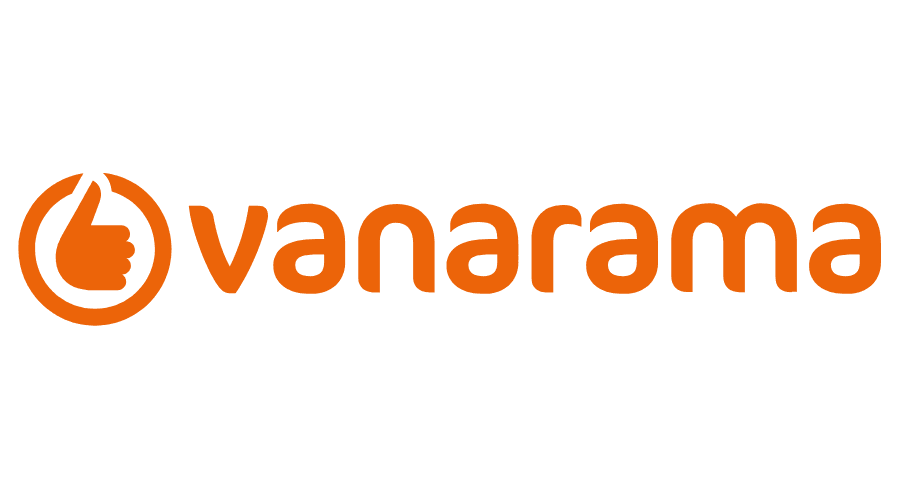

In [87]:
s # result of applying BeautifulSoup html.parser on the json

In [ ]:
articles # result of applying the .find_all method on the BeautifulSoup object

In [ ]:
#                 # If no results or reached end of results...
#                 if len(articles) == 0 or r.url[r.url.find("page=")+5:] != str(page):
#                     if verbose:
#                         print("Found total", n_this_year_results, "results for year", year, "across", page-1, "pages")
#                         if year+1 <= max_year:
#                             print("Moving on to year", year + 1)
#                             print("---------------------------------")

#                     # Increment year and reset relevant variables
#                     year = year + 1
#                     page = 1
#                     attempt = 1
#                     n_this_year_results = 0
#                 else:

In [88]:
article = articles[1]

In [89]:
article

<article class="product-card js-standout-listing" data-advert-id="202304286788645" data-standout-type="">
<div class="product-card__inner">
<section class="product-card-image">
<div class="listing-image-count">
<i class="listing-image-icon" data-label="search appearance click ">
<svg>
<use xlink:href="/templates/_generated/svg_icons/search-listings.svg#icon-camera"></use>
</svg>
</i> 58


                                                        <!--replace with hasSpin-->
</div>
<img alt="" class="product-card-image__image product-card-image__main-image" data-label="search appearance click " loading="lazy" sizes="
                                                            (max-width: 1024px) 262px,
                                                            340px
                                                            " src="https://m.atcdn.co.uk/a/media/w340h255pf7f7f5/3f1beaa01edf467691ab5d4b17c29b3c.jpg" srcset="
                                                            https:

In [90]:
# find the link
article.find("a", {"class": "listing-fpa-link"})["href"][: article.find("a", {"class": "listing-fpa-link"})["href"] \
                              .find("?")]

'/car-details/202304286788645'

In [92]:
# find the subtitle


article.find("p", {"class": "product-card-details__subtitle"}).text.strip()  

'38kWh Premium 5dr'

In [ ]:
                    for article in articles:
                        car = {}
                        car["model"] = make + " " + model
                        car["name"] = article.find("h3", {"class": "product-card-details__title"}).text.strip()             
                        car["link"] = "https://www.autotrader.co.uk" + \
                              article.find("a", {"class": "listing-fpa-link"})["href"][: article.find("a", {"class": "listing-fpa-link"})["href"] \
                              .find("?")]
                        car["price"] = article.find("div", {"class": "product-card-pricing__price"}).text.strip()

                        seller_info = article.find("ul", {"class": "product-card-seller-info__specs"}).text.strip()
                        car["seller"] = " ".join(seller_info.split())

                        key_specs_bs_list = article.find("ul", {"class": "listing-key-specs"}).find_all("li")
                        # car["subtitle"] = article.find("ul", {"class": "search-listing-subtitle"}).text.strip() 
                        car["subtitle"] = article.find("h3", {"class": "product-card-details__subtitle"}).text.strip()  


                        for key_spec_bs_li in key_specs_bs_list:

                            key_spec_bs = key_spec_bs_li.text

                            if any(keyword in key_spec_bs for keyword in keywords["mileage"]):
                                car["mileage"] = int(key_spec_bs[:key_spec_bs.find(" miles")].replace(",",""))
                            elif any(keyword in key_spec_bs for keyword in keywords["BHP"]):
                                car["BHP"] = int(key_spec_bs[:key_spec_bs.find("BHP")])
                            elif any(keyword in key_spec_bs for keyword in keywords["transmission"]):
                                car["transmission"] = key_spec_bs
                            elif any(keyword in key_spec_bs for keyword in keywords["fuel"]):
                                car["fuel"] = key_spec_bs
                            elif any(keyword in key_spec_bs for keyword in keywords["owners"]):
                                car["owners"] = int(key_spec_bs[:key_spec_bs.find(" owners")])
                            elif any(keyword in key_spec_bs for keyword in keywords["body"]):
                                car["body"] = key_spec_bs
                            elif any(keyword in key_spec_bs for keyword in keywords["ULEZ"]):
                                car["ULEZ"] = key_spec_bs
                            elif any(keyword in key_spec_bs for keyword in keywords["year"]):
                                car["year"] = key_spec_bs
                            elif key_spec_bs[1] == "." and key_spec_bs[3] == "L":
                                car["engine"] = key_spec_bs

                        results.append(car)
                        n_this_year_results = n_this_year_results + 1

                    page = page + 1
                    attempt = 1

                    # if verbose:
                    #     print("Car count: ", len(results))
                    #     print("---------------------------------")

        except KeyboardInterrupt:
            break

        except:
            traceback.print_exc()
            attempt = attempt + 1
            if attempt <= max_attempts_per_page:
                if verbose:
                    print("Exception. Starting attempt #", attempt, "and keeping at page #", page)
            else:
                page = page + 1
                attempt = 1
                if verbose:
                    print("Exception. All attempts exhausted for this page. Skipping to next page #", page)

except KeyboardInterrupt:
    pass